# Práctica 4 - Regresión Polinomial
> Machine Learning and Artificial Intelligence - PhD Consuelo Varinia García Mendoza

> Daniel Armas Ramírez

In [52]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDRegressor

In [62]:
df = pd.read_csv('./datos.csv')
X = df[['x']]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, shuffle = True, train_size=0.7, test_size=0.3)

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

### Regresión lineal con OLS

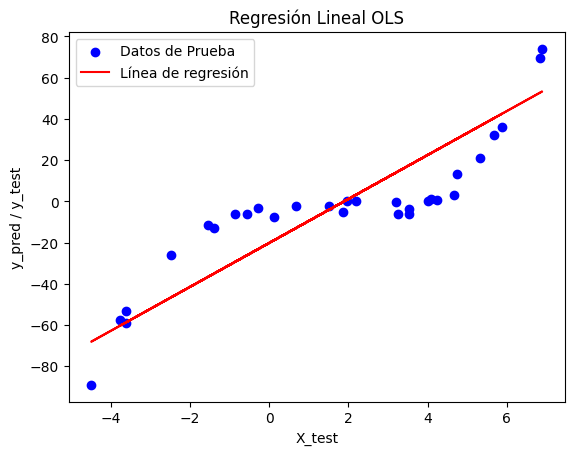

In [36]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


ols_data = ['Regresión Lineal con OLS', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]

plt.scatter(X_test, y_test, color='blue', label='Datos de Prueba')
plt.plot(X_test, y_pred, color='red', label='Línea de regresión')
plt.xlabel('X_test')
plt.ylabel('y_pred / y_test')
plt.title('Regresión Lineal OLS')
plt.legend()
plt.show()

### Regresión polinomial grado 2 con OLS

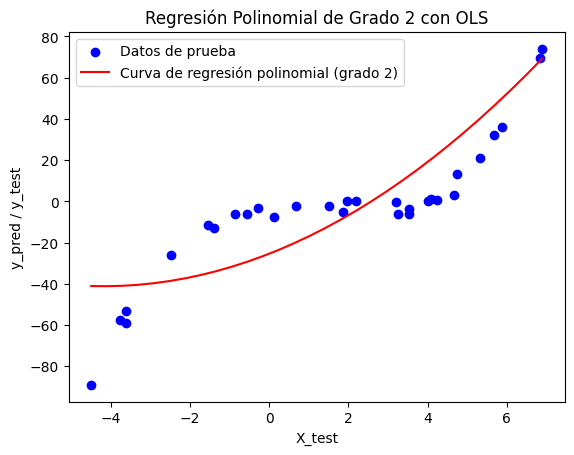

In [55]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X_train.reshape(-1, 1))

poly_reg_model_2 = LinearRegression()
poly_reg_model_2.fit(poly_features, y_train)

x_test = np.linspace(X_test.min(), X_test.max(), 30).reshape(-1, 1)

y_pred = poly_reg_model_2.predict(poly.transform(x_test))

ols_2_data = ['Regresión Polinomial de grado 2 con OLS', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]

plt.scatter(X_test, y_test, color='blue', label='Datos de prueba')
plt.plot(x_test, y_pred, color='red', label='Curva de regresión polinomial (grado 2)')
plt.xlabel('X_test')
plt.ylabel('y_pred / y_test')
plt.title('Regresión Polinomial de Grado 2 con OLS')
plt.legend()
plt.show()

### Regresión polinomial grado 3 con OLS

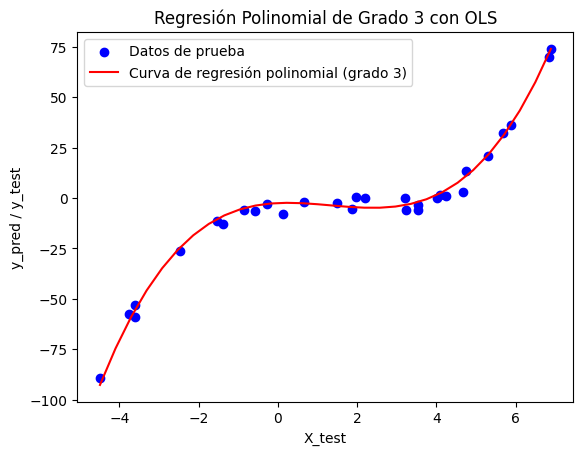

In [57]:
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(X_train.reshape(-1, 1))

poly_reg_model_3 = LinearRegression()
poly_reg_model_3.fit(poly_features, y_train)

x_test = np.linspace(X_test.min(), X_test.max(), 30).reshape(-1, 1)

y_pred = poly_reg_model_3.predict(poly.transform(x_test))

ols_3_data = ['Regresión Polinomial de grado 3 con OLS', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]

plt.scatter(X_test, y_test, color='blue', label='Datos de prueba')
plt.plot(x_test, y_pred, color='red', label='Curva de regresión polinomial (grado 3)')
plt.xlabel('X_test')
plt.ylabel('y_pred / y_test')
plt.title('Regresión Polinomial de Grado 3 con OLS')
plt.legend()
plt.show()

### Regresión Lineal con SGD 

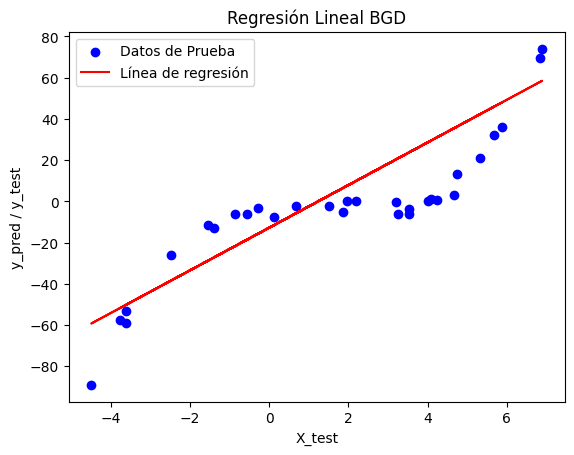

In [59]:
sgdr = SGDRegressor()
sgdr.fit(X_train, y_train)

y_pred = sgdr.predict(X_test)

sgd_data = ['Regresión Lineal con SGD', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]

plt.scatter(X_test, y_test, color='blue', label='Datos de Prueba')
plt.plot(X_test, y_pred, color='red', label='Línea de regresión')
plt.xlabel('X_test')
plt.ylabel('y_pred / y_test')
plt.title('Regresión Lineal BGD')
plt.legend()
plt.show()

### Regresión polinomial grado 2 con SGD

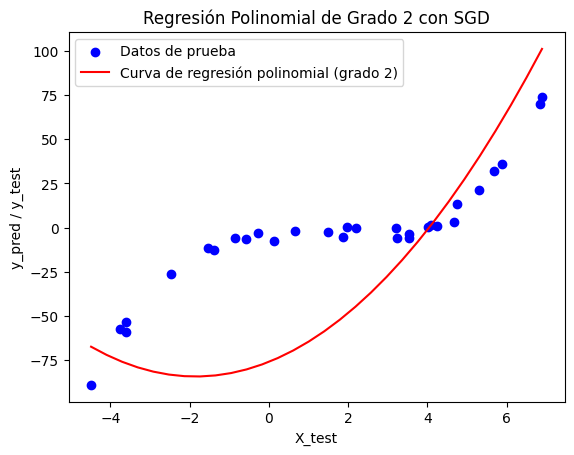

In [61]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X_train.reshape(-1, 1))

poly_sgd_model_2 = SGDRegressor()
poly_sgd_model_2.fit(poly_features, y_train)

x_test = np.linspace(X_test.min(), X_test.max(), 30).reshape(-1, 1)

y_pred = poly_sgd_model_2.predict(poly.transform(x_test))

sgd_2_data = ['Regresión Polinomial de grado 2 con SGD', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]

plt.scatter(X_test, y_test, color='blue', label='Datos de prueba')
plt.plot(x_test, y_pred, color='red', label='Curva de regresión polinomial (grado 2)')
plt.xlabel('X_test')
plt.ylabel('y_pred / y_test')
plt.title('Regresión Polinomial de Grado 2 con SGD')
plt.legend()
plt.show()

### Regresión polinomial grado 3 con SGD

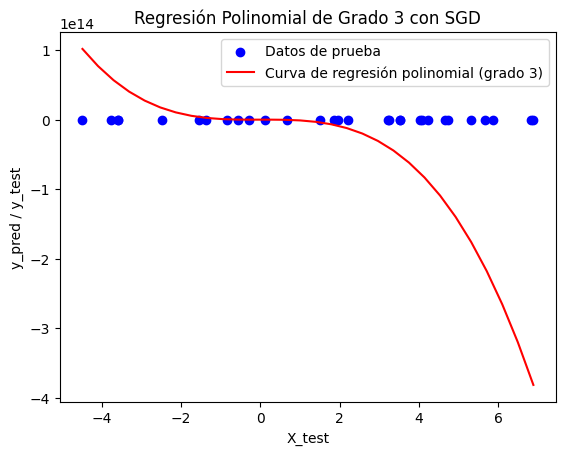

In [63]:
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(X_train.reshape(-1, 1))

poly_sgd_model_3 = SGDRegressor()
poly_sgd_model_3.fit(poly_features, y_train)

x_test = np.linspace(X_test.min(), X_test.max(), 30).reshape(-1, 1)

y_pred = poly_sgd_model_3.predict(poly.transform(x_test))

sgd_3_data = ['Regresión Polinomial de grado 3 con SGD', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]

plt.scatter(X_test, y_test, color='blue', label='Datos de prueba')
plt.plot(x_test, y_pred, color='red', label='Curva de regresión polinomial (grado 3)')
plt.xlabel('X_test')
plt.ylabel('y_pred / y_test')
plt.title('Regresión Polinomial de Grado 3 con SGD')
plt.legend()
plt.show()

### Resultados

In [64]:
data = [ols_data, ols_2_data, ols_3_data, sgd_data, sgd_2_data, sgd_3_data]
results = pd.DataFrame(data, columns = ['Model', 'MSE', 'R^2'])
results

,Model,MSE,R^2
0,Regresión Lineal con OLS,2.960946e+02,7.198048e-01
1,Regresión Polinomial de grado 2 con OLS,2.149023e+03,-1.033627e+00
2,Regresión Polinomial de grado 3 con OLS,1.964920e+03,-8.594094e-01
3,Regresión Lineal con SGD,3.523617e+02,6.665591e-01
4,Regresión Polinomial de grado 2 con SGD,5.192349e+03,-3.913535e+00
5,Regresión Polinomial de grado 3 con SGD,1.551304e+28,-1.468003e+25


## Parte 2

In [80]:
df_2 = pd.read_csv('./cal_housing.csv')
X = df_2[['longitude', 'latitude', 'housingMedianAge', 'totalRooms', 'totalBedrooms', 'population', 'households', 'medianIncome']]
y = df_2['medianHouseValue']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, shuffle = True, train_size=0.8, test_size=0.2)

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

### Regresión Lineal

In [71]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
lireg = ['Regresión Lineal', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]
lireg

['Regresión Lineal', 4853781771.947937, 0.6277645980446473]

### Regresión Polinomial Grado 2

In [68]:
model = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression())
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

lreg_2_data = ['Regresión Polinomial de grado 2', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]
lreg_2_data

['Regresión Polinomial de grado 2', 4076152929.289472, 0.6874007742097907]

### Regresión Polinomial Grado 2 con escalamiento estándar

In [70]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

model = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression())
model.fit(X_scaled, y_train)

y_pred = model.predict(X_test_scaled)

lreg_2_std_data = ['Regresión Polinomial de grado 2 con escalamiento estándar', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]
lreg_2_std_data

['Regresión Polinomial de grado 2 con escalamiento estándar',
 4088291491.7083135,
 0.6864698706641779]

### Regresión Polinomial Grado 2 con escalamiento robusto

In [75]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

model = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression())
model.fit(X_scaled, y_train)

y_pred = model.predict(X_test_scaled)

lreg_2_rbs_data = ['Regresión Polinomial de grado 2 con escalamiento robusto', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]
lreg_2_rbs_data

['Regresión Polinomial de grado 2 con escalamiento robusto',
 4105496476.5316834,
 0.685150424355657]

### Regresión Polinomial Grado 3 con escalamiento estándar

In [85]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

model = make_pipeline(PolynomialFeatures(degree=3, include_bias=False), LinearRegression())
model.fit(X_scaled, y_train)

y_pred = model.predict(X_test_scaled)

lreg_3_std_data = ['Regresión Polinomial de grado 3 con escalamiento estándar', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]
lreg_3_std_data

['Regresión Polinomial de grado 3 con escalamiento estándar',
 4217104481.804383,
 0.6765912322337075]

### Regresión Polinomial Grado 3 con escalamiento robusto

In [86]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

model = make_pipeline(PolynomialFeatures(degree=3, include_bias=False), LinearRegression())
model.fit(X_scaled, y_train)

y_pred = model.predict(X_test_scaled)

lreg_3_rbs_data = ['Regresión Polinomial de grado 3 con escalamiento robusto', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]
lreg_3_rbs_data

['Regresión Polinomial de grado 3 con escalamiento robusto',
 4232123515.69783,
 0.6754394259966372]

### Resultados

In [87]:
data = [lireg, lreg_2_data, lreg_2_std_data, lreg_2_rbs_data, lreg_3_std_data, lreg_3_rbs_data]
results = pd.DataFrame(data, columns = ['Model', 'MSE', 'R^2'])
results

,Model,MSE,R^2
0,Regresión Lineal,4.853782e+09,0.627765
1,Regresión Polinomial de grado 2,4.076153e+09,0.687401
2,Regresión Polinomial de grado 2 con escalamien...,4.088291e+09,0.686470
3,Regresión Polinomial de grado 2 con escalamien...,4.105496e+09,0.685150
4,Regresión Polinomial de grado 3 con escalamien...,4.217104e+09,0.676591
5,Regresión Polinomial de grado 3 con escalamien...,4.232124e+09,0.675439
